# Backpropagation

In [1]:
import pandas as pd
import numpy as np
import base64

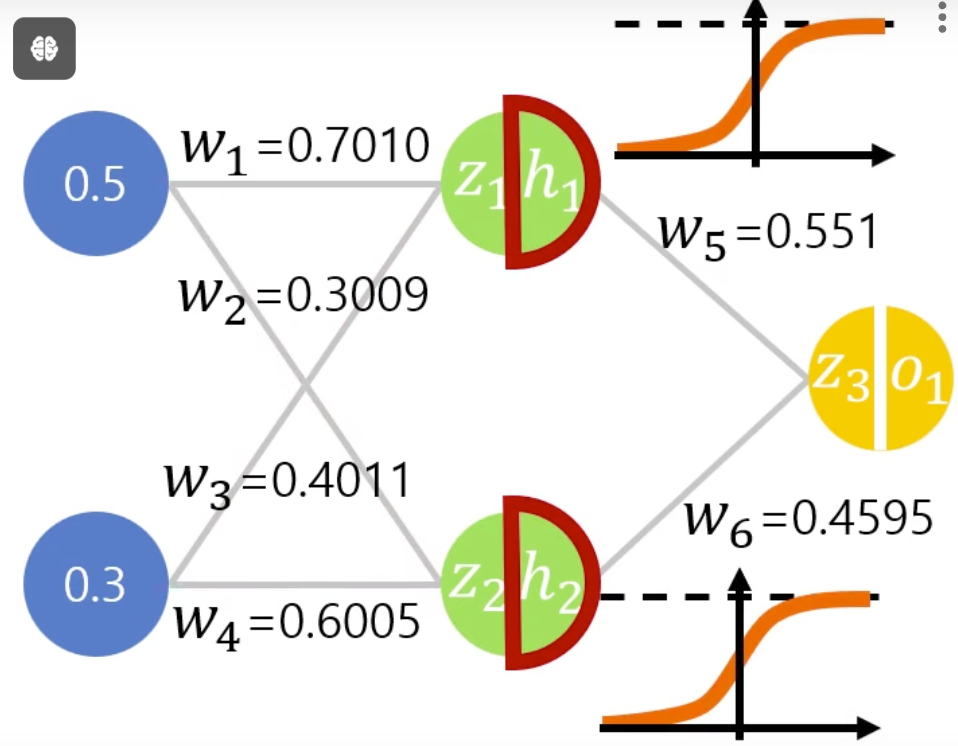

In [2]:
# Sigmoid Function: Q(x) = 1 / (1 + e^(-x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

sigmoid(3)


# Sigmoid Derivative: Q'(x) = Q(x) * (1 - Q(x))
def sigmoid_derivative(sigmoid_output):
    return sigmoid(sigmoid_output) * (1 - sigmoid(sigmoid_output))

Sigmoid Function (Activation Function) 

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The derivative of the sigmoid function is:

$$
\sigma'(x) = \sigma(x) \cdot (1 - \sigma(x))
$$

- np.exp(x) -> it means ${e^x}$, where e is Euler's number (approximately equal to 2.71828).
- np.exp supports both scalar and array inputs.
- math.exp(x) -> it also means ${e^x}$, but only supports scalar values.

In [3]:
# inputs
x1 = 0.5
x2 = 0.3

In [4]:
# expected output
y_expected = 1

# learning rate
n = 0.1

In [5]:
# weights

w1 = 0.7010
w2 = 0.3009
w3 = 0.4011
w4 = 0.6005
w5 = 0.551
w6 = 0.4595

## Forward Pass

Network Architecture:
- Inputs: $x_1$, $x_2$
- Hidden Layer: Two neurons ($h_1$, $h_2$)
- Output Layer: Single neuron

- Forward Propagation Formulas:
- First Hidden Neuron: 
$$ z_1 = x_1 \cdot w_1 + x_2 \cdot w_3 $$
 $$ h_1 = \sigma(z_1) $$

 - Second Hidden Neuron:
$$ z_2 = x_1 \cdot w_2 + x_2 \cdot w_4 $$
$$ h_2 = \sigma(z_2) $$

In [6]:
# Neurons and activation function step
def l1f1(x1,x2):
    l1f1_result = x1*w1 + x2*w3 # z1 step
    return sigmoid(l1f1_result) # h1 step, activation func applied

def l1f2(x1,x2):
    l1f2_result = x1*w2 + x2*w4 #z2 step
    return sigmoid(l1f2_result) # h2 step, activation func applied

In [7]:
# Output layer
def of1(h1,h2):
    of1_result = h1*w5 + h2*w6 # z3 step
    return sigmoid(of1_result) # h3 step, activation

In [8]:
h1 = l1f1(x1,x2)
h2 = l1f2(x1,x2)

print("h1: ", round(h1,3))
print("h2: ", round(h2, 3))

h1:  0.616
h2:  0.582


In [9]:
output1 = of1(h1, h2)
print("output1: ", round(output1, 3))

output1:  0.647


### Lost / Cost / Error Function

In [10]:
# Means Squared Error
def mse(y_expected, y_predicted):
    return (y_expected - y_predicted) ** 2 # y is th e expected output, y_hat is the predicted output

# MSE Derivative
def mse_derivative(y_expected, y_predicted):
    return -2 * (y_expected - y_predicted)

#### Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a commonly used loss function in machine learning. 
The formula for MSE is:


$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_{\text{expected}, i} - y_{\text{predicted}, i})^2
$$

Where:
- \( N \) is the total number of samples.


The Mean Squared Error (MSE) is defined as:

The derivative of MSE with respect to y_predicted is:

$$
\frac{\partial \text{MSE}}{\partial y_{\text{predicted}}} = -\frac{2}{N} (y_{\text{expected}} - y_{\text{predicted}})
$$


For simplicity, if we omit the $\frac{1}{N}$ term (e.g., for a single training example or simplicity in implementation), the derivative becomes:

$$
\frac{\partial \text{MSE}}{\partial y_{\text{predicted}}} = -2 (y_{\text{expected}} - y_{\text{predicted}})
$$


##### In our case: Simplification in backpropagation
- In backpropagation, the key goal is to compute the gradient of the loss with respect to the weights.

- We did not include $\frac{1}{N}$ factor in the case of MSE because our example is simple, so it does not affect the result much.

- In larger neural networks with multiple examples, $\frac{1}{N}$ to average the gradient, which helps make the weight updates more stable.

In [11]:
first_mse = mse(y_expected, output1)
print("MSE: ", round(first_mse, 3))
print("Expected: ", y_expected, "|", "Predicted: ", round(output1, 3))

MSE:  0.124
Expected:  1 | Predicted:  0.647


## Backward Pass

#### Output

In [12]:
# Derivative of the loss function with respect to the output layer (y_predicted)
dL_o1 = mse_derivative(y_expected, output1) 
print("dL_o1: ", round(dL_o1, 3))

dL_o1:  -0.706


Gradient of the Loss w.r.t. Output $o_1$

Derivative of the loss with respect to $o_1$:

$$
\frac{\partial L}{\partial o_1} = -2 \cdot (y_{\text{expected}} - o_1)
$$

Where:
- $y_{\text{expected}}$ is the true value.
- $o_1$ is the predicted output.


In [13]:
# Gradient of the loss wrt output
do1_z3 = sigmoid_derivative(dL_o1)
print("do1_z3: ", round(do1_z3, 3))

do1_z3:  0.221


- Gradient of Output w.r.t. ${z_3}$ (Pre-activation Output)

Using the sigmoid derivative:

$$
\frac{\partial o_1}{\partial z_3} = \sigma(z_3) \cdot (1 - \sigma(z_3))
$$

- Chain Rule: Loss Gradient w.r.t. \(z_3\)

Using the chain rule:

$$
\frac{\partial L}{\partial z_3} = \frac{\partial L}{\partial o_1} \cdot \frac{\partial o_1}{\partial z_3}
$$


#### Hidden Layers: ${H_2}$ and ${H_1}$

In [14]:
dw5 = dL_o1 * do1_z3 * h1
dw6 = dL_o1 * do1_z3 * h2
print("dw5: ", round(dw5, 3))
print("dw6: ", round(dw6, 3))

dw5:  -0.096
dw6:  -0.091


Gradient of the Output Layer Weights

The gradient for $ w_5 $ is calculated as:

$$
\Delta w_5 = \frac{\partial L}{\partial w_5} = \frac{\partial h_3}{\partial L} \cdot \frac{\partial z_3}{\partial h_3} \cdot \frac{\partial w_5}{\partial z_3} = \text{dL}_{o1} \cdot \text{do1}_{z3} \cdot h_1
$$

The gradient for $ w_6 $ is calculated as:

$$
\Delta w_6 = \frac{\partial L}{\partial w_6} = \text{dL}_{o1} \cdot \text{do1}_{z3} \cdot h_2
$$


In [15]:
# Gradients for hidden layer
dh1_z1 = sigmoid_derivative(h1)
dh2_z2 = sigmoid_derivative(h2)

In [16]:
#  Backpropagation to hidden layer
dL_h1 = dL_o1 * do1_z3 * w5
dL_h2 = dL_o1 * do1_z3 * w6

Gradient of the Input Layer Weights

The gradient for $ w_1 $ is calculated as:

$$
\Delta w_1 = \frac{\partial L}{\partial w_1} = \text{dL}_{h1} \cdot \text{dh1}_{z1} \cdot x_1
$$

The gradient for $ w_2 $ is calculated as:

$$
\Delta w_2 = \frac{\partial L}{\partial w_2} = \text{dL}_{h2} \cdot \text{dh2}_{z2} \cdot x_1
$$

The gradient for $ w_3 $ is calculated as:

$$
\Delta w_3 = \frac{\partial L}{\partial w_3} = \text{dL}_{h1} \cdot \text{dh1}_{z1} \cdot x_2
$$

The gradient for $ w_4 $ is calculated as:

$$
\Delta w_4 = \frac{\partial L}{\partial w_4} = \text{dL}_{h2} \cdot \text{dh2}_{z2} \cdot x_2
$$


In [17]:
# Gradients for input layer weights
dw1 = dL_h1 * dh1_z1 * x1
dw2 = dL_h2 * dh2_z2 * x1
dw3 = dL_h1 * dh1_z1 * x2
dw4 = dL_h2 * dh2_z2 * x2

print("dw1: ", round(dw1, 3))
print("dw2: ", round(dw2, 3))
print("dw3: ", round(dw3, 3))
print("dw4: ", round(dw4, 3))

dw1:  -0.01
dw2:  -0.008
dw3:  -0.006
dw4:  -0.005


#### Update weights

Weight Update Rule

The weight update rule is given by:

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \Delta w
$$


In [18]:
w1_new = w1 - n * dw1
w2_new = w2 - n * dw2
w3_new = w3 - n * dw3
w4_new = w4 - n * dw4
w5_new = w5 - n * dw5
w6_new = w6 - n * dw6

In [19]:
print("\nUpdated Weights:")
print("w1: ", round(w1_new, 4))
print("w2: ", round(w2_new, 4))
print("w3: ", round(w3_new, 4))
print("w4: ", round(w4_new, 4))
print("w5: ", round(w5_new, 4))
print("w6: ", round(w6_new, 4))


Updated Weights:
w1:  0.702
w2:  0.3017
w3:  0.4017
w4:  0.601
w5:  0.5606
w6:  0.4686


In [20]:
# Re-run forward propagation with updated weights
def l1f1_new(x1, x2):
    l1f1_result = x1*w1_new + x2*w3_new
    return sigmoid(l1f1_result)

def l1f2_new(x1, x2):
    l1f2_result = x1*w2_new + x2*w4_new
    return sigmoid(l1f2_result)

def of1_new(h1, h2):
    of1_result = h1*w5_new + h2*w6_new
    return sigmoid(of1_result)

h1_new = l1f1_new(x1, x2)
h2_new = l1f2_new(x1, x2)
output1_new = of1_new(h1_new, h2_new)

print("\nAfter Weight Update:")
print("h1: ", round(h1_new, 3))
print("h2: ", round(h2_new, 3))
print("output1: ", round(output1_new, 3))


After Weight Update:
h1:  0.616
h2:  0.582
output1:  0.65


In [21]:
# Recalculate MSE
new_mse = mse(y_expected, output1_new)
print("New MSE: ", round(new_mse, 3))

New MSE:  0.123
